In [281]:
#1.Si existen 0s poner el ultimo valor obtenido
#2.Obtener nueva columna de variacion.
import math
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import multivariate_normal

import prince

import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.colors import from_levels_and_colors
import seaborn as sns
def rellenar_ceros(df):
    df_nuevo = df.copy()
    for col in df_nuevo.select_dtypes(include='number').columns:
        df_nuevo[col] = df_nuevo[col].replace(0, pd.NA).ffill()
    return df_nuevo

In [282]:
df_merval = pd.read_csv("../../datasets/Merval.csv", index_col=0)
df_merval = df_merval.iloc[2:]
for c in df_merval.columns:
    df_merval[c] = df_merval[c].str.replace('.', '')
    df_merval[c] = df_merval[c].str.replace(',', '.')
    df_merval[c] = df_merval[c].astype(float)

In [283]:
#Remplazo 0 con nan
df_merval = rellenar_ceros(df_merval)

In [284]:
#df_merval = df_merval.dropna(how='all')
df_merval.columns

Index(['AGRO', 'ALUA', 'BBAR', 'BMA', 'BYMA', 'GGAL', 'SUPV', 'PAMP', 'YPFD',
       'VALO', 'CEPU', 'TRAN', 'TXAR', 'LOMA', 'HARG', 'COME', 'CRES', 'TGNO4',
       'TGSU2', 'EDN', 'CVH', 'MIRG', 'TECO2', 'AUSO', 'BHIP', 'BOLT', 'BPAT',
       'CADO', 'CAPX', 'CARC', 'CECO2', 'CELU', 'CGPA2', 'CTIO', 'DGCU2',
       'DOME', 'DYCA', 'ESME', 'FERR', 'FIPL', 'GAMI', 'GARO', 'GBAN', 'GCLA',
       'GRIM', 'HAVA', 'INTR', 'INVJ', 'IRSA', 'LEDE', 'LONG', 'METR', 'MOLA',
       'MOLI', 'MORI', 'MTR', 'OEST', 'PATA', 'PGR', 'POLL', 'RICH', 'ROSE',
       'SAMI', 'SEMI', 'TGLT', 'AMZN', 'AAPL', 'BABA', 'C', 'DISN', 'FB',
       'GLNT', 'GOLD', 'GOOGL', 'INTC', 'KO', 'MCD', 'MELI', 'MSFT', 'NFLX',
       'PBR', 'TSLA'],
      dtype='object')

In [285]:
#cdf = df_merval[["MORI",'HAVA','MOLI','LEDE']]
#cdf = df_merval[["MORI",'HAVA','MOLI','LEDE', 'MELI', 'AMZN']]
#cdf = df_merval[["MORI",'HAVA','MOLI','LEDE', 'MELI', 'AMZN',  'GOOGL']]
cdf  = df_merval.loc[:, ['HAVA','MOLI', 'LEDE', "MORI", 'MELI', 'AMZN',  'GOOGL', "ALUA", 'TXAR']].copy()
ms = ['ward', 'average', 'single', 'complete']


In [ ]:
cdf = cdf.dropna()
cdf[cdf.isnull().any(axis=1)]


In [ ]:
for c in cdf.columns:
    cdf[c] = cdf[c].pct_change()

cdf.dropna(inplace=True)
cdf[cdf.isnull().any(axis=1)]


In [289]:
df_tras = cdf.transpose(copy=True)
df_tras[df_tras.isnull().any(axis=1)]

FECHA,3/03/2024,2/03/2024,1/03/2024,29/02/2024,28/02/2024,27/02/2024,26/02/2024,25/02/2024,24/02/2024,23/02/2024,...,8/04/2023,7/04/2023,6/04/2023,5/04/2023,4/04/2023,3/04/2023,2/04/2023,1/04/2023,31/03/2023,30/03/2023


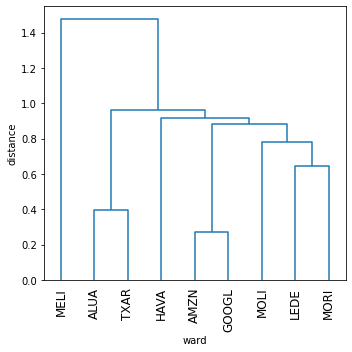

1 : ALUA, TXAR
2 : AMZN, GOOGL
3 : MOLI, LEDE, MORI
4 : HAVA
5 : MELI


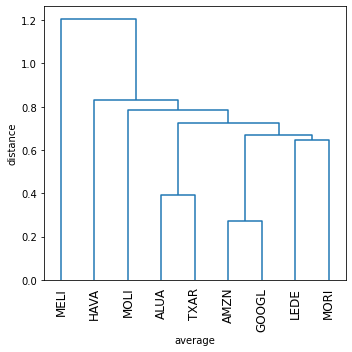

1 : ALUA, TXAR
2 : LEDE, MORI, AMZN, GOOGL
3 : MOLI
4 : HAVA
5 : MELI


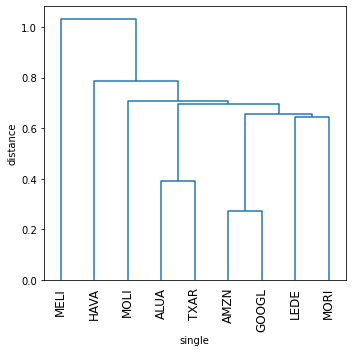

1 : ALUA, TXAR
2 : LEDE, MORI, AMZN, GOOGL
3 : MOLI
4 : HAVA
5 : MELI


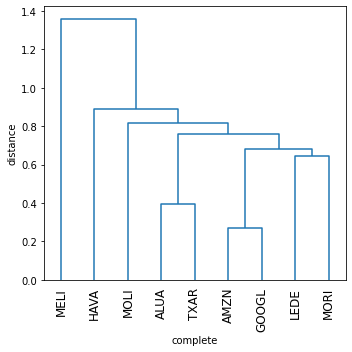

1 : ALUA, TXAR
2 : LEDE, MORI, AMZN, GOOGL
3 : MOLI
4 : HAVA
5 : MELI


In [291]:
for m in ms:
    Z = linkage(df_tras, method=m)
    fig, ax = plt.subplots(figsize=(5, 5))
    dendrogram(Z, labels=list(df_tras.index), color_threshold=0)
    plt.xticks(rotation=90)
    ax.set_ylabel('distance')
    ax.set_xlabel(m)
    plt.tight_layout()
    plt.show()


    cgrupos = 5
    memb = fcluster(Z, cgrupos, criterion='maxclust')
    memb = pd.Series(memb, index=cdf.transpose().index)
    for key, item in memb.groupby(memb):
        print(f"{key} : {', '.join(item.index)}")